In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_4mu_v10.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", location_cfg="signal_2mu2e_v10.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["lj_iso_base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-4.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-4
.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-39.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
9.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-38.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
8.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-37.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
7.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-36.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
6.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-35.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
5.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-34.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
4.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-33.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
3.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-32.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
2.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-31.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
1.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-30.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
0.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-3
.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-29.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
9.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-28.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
8.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-27.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
7.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-26.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
6.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-25.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
5.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-24.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
4.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-23.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
3.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-22.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
2.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-21.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
1.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-20.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
0.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-2
.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-19.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
9.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-18.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
8.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-17.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
7.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-16.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
6.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-15.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
5.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-14.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
4.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-13.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
3.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-12.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
2.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-11.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
1.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-10.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
0.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-1
.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0
_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-0.root; permission 
denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2M
u2e_MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_v3_part-0
.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

In [4]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    "TTJets",
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

(0.1, 1000000)

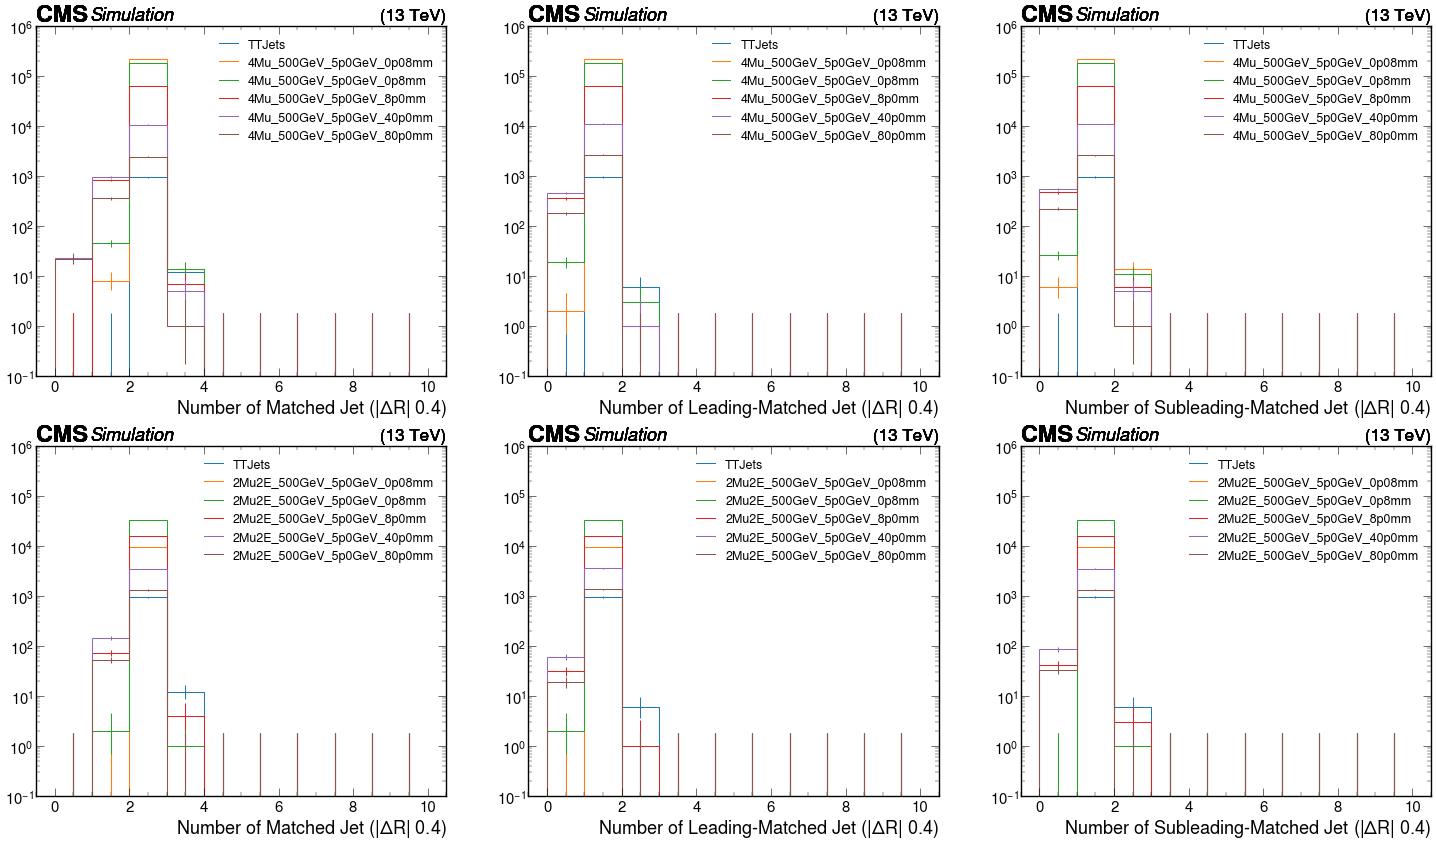

In [5]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

(0.1, 1000000)

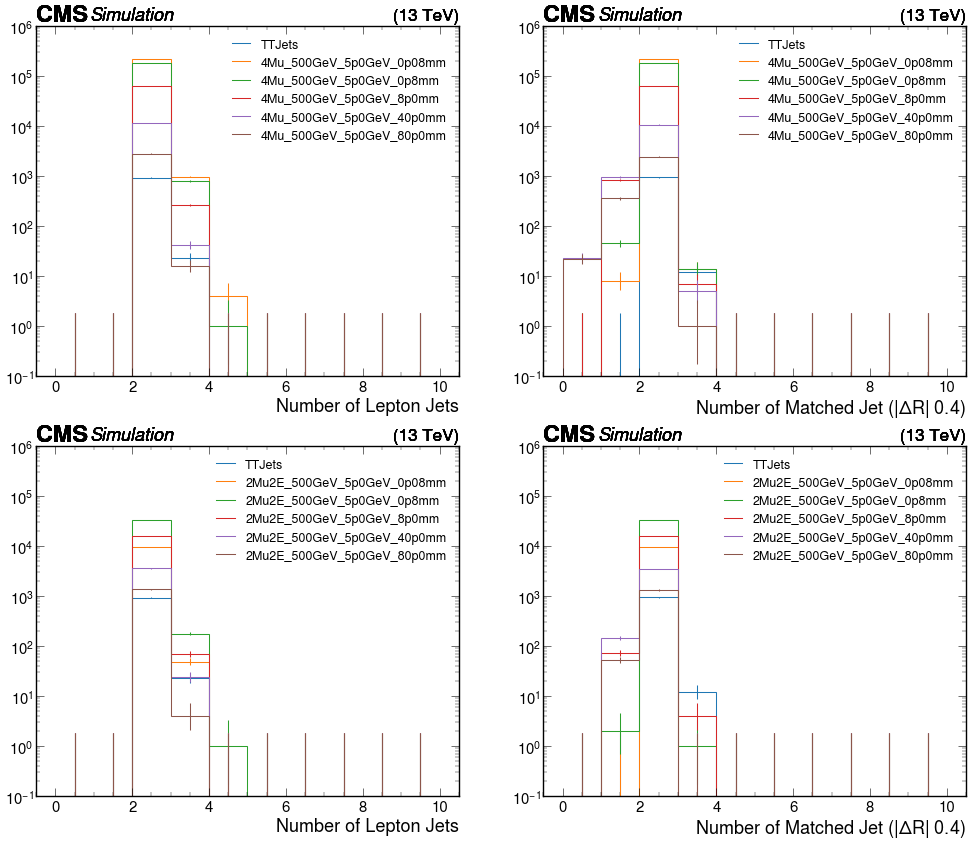

In [6]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

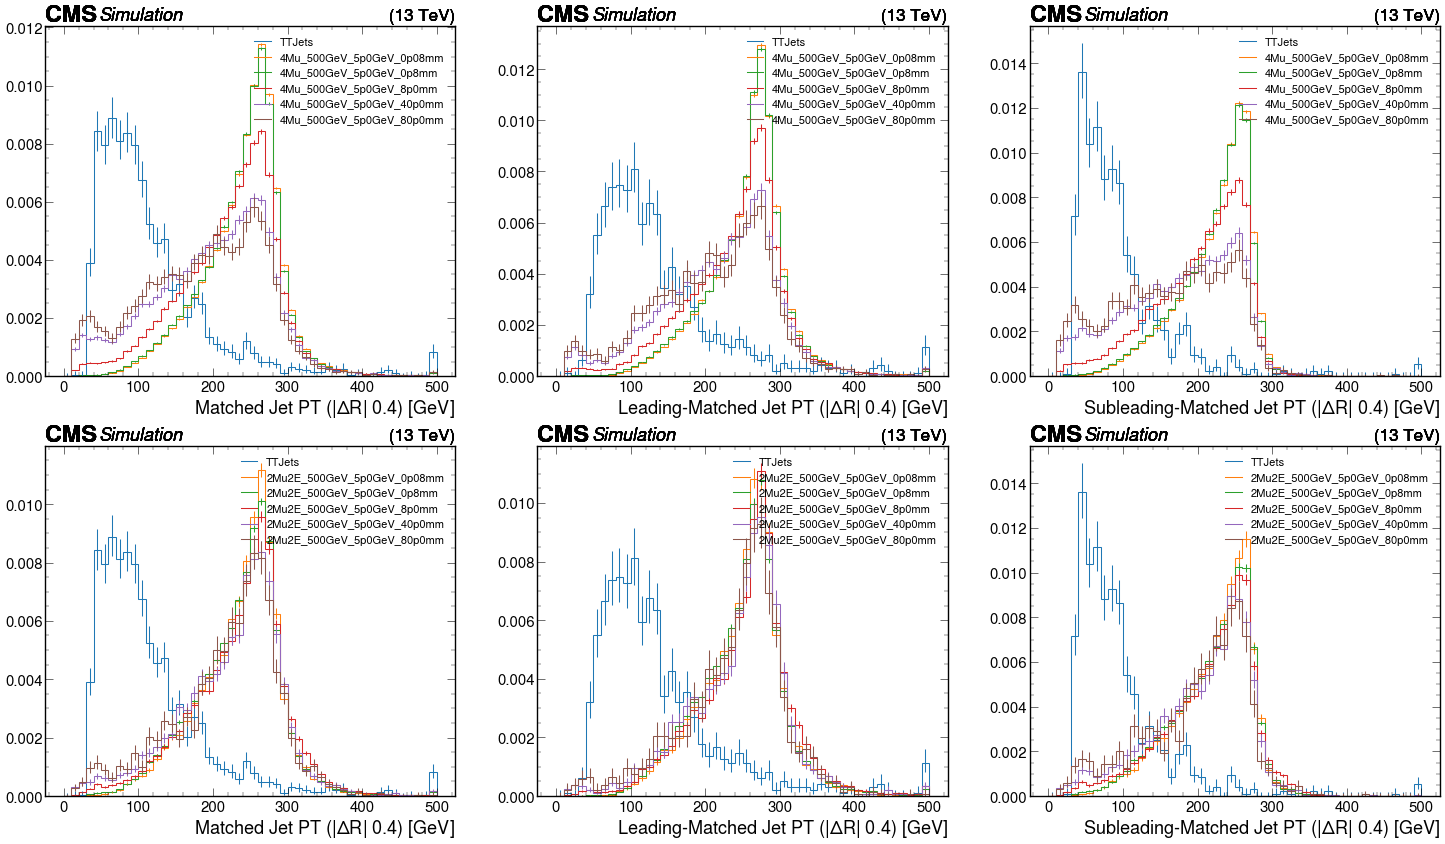

In [7]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

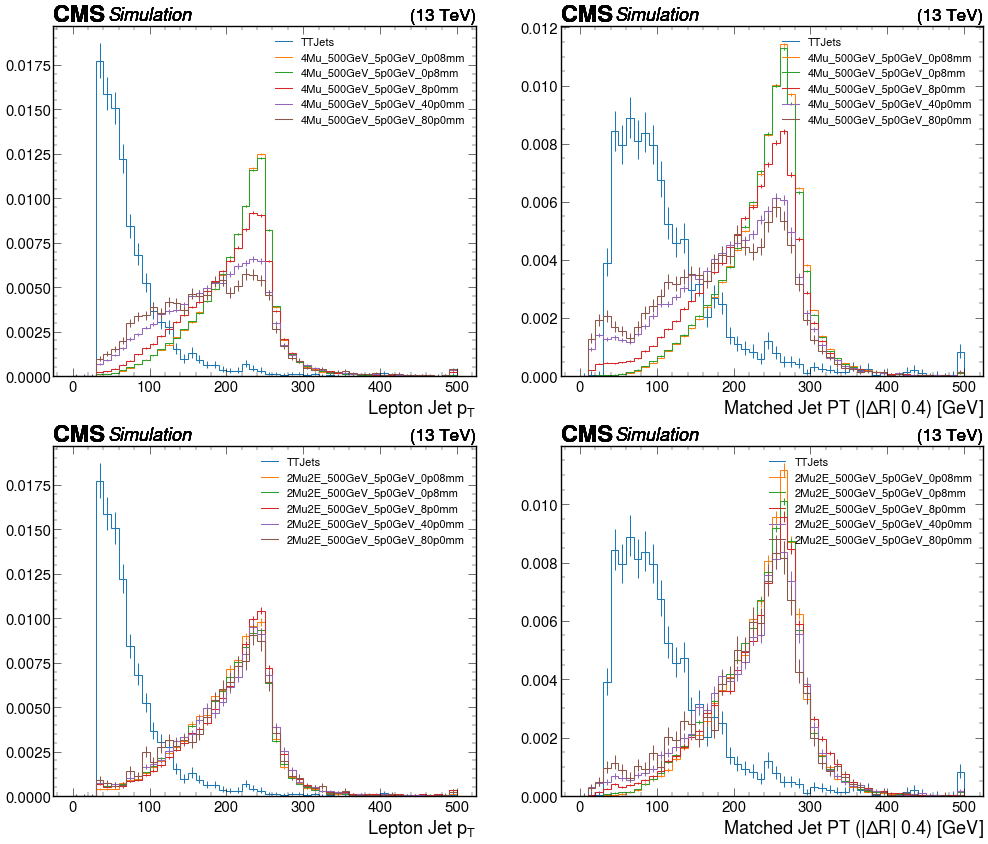

In [8]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

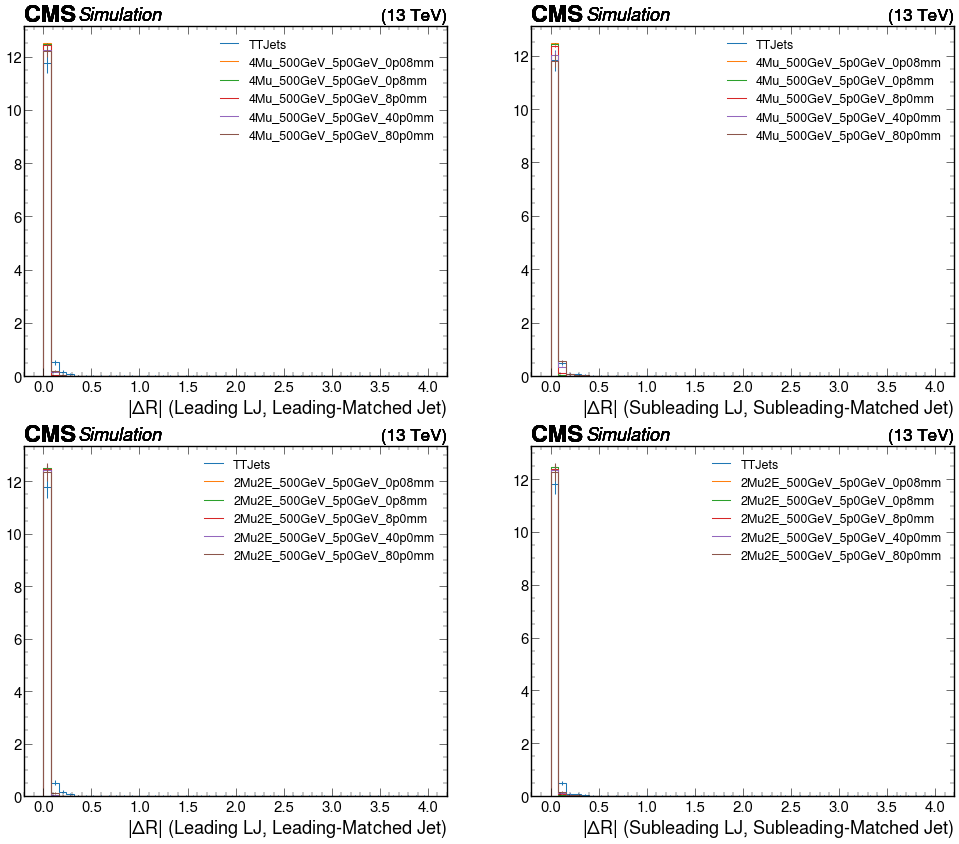

In [9]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

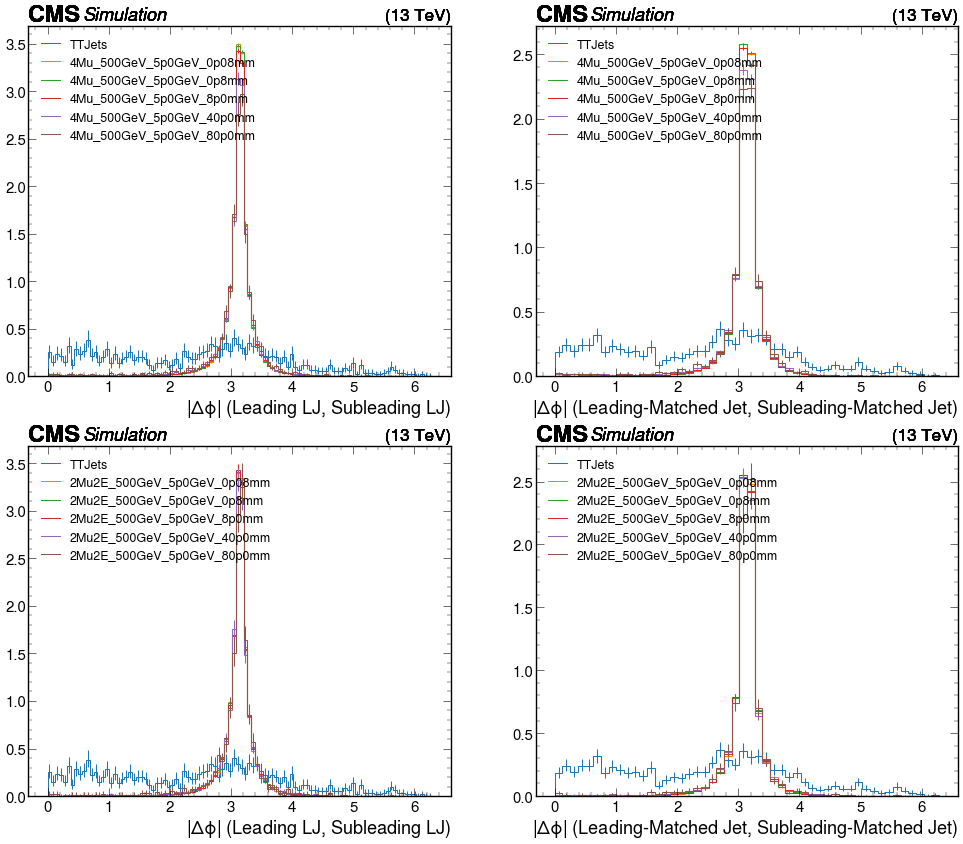

In [10]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 18})

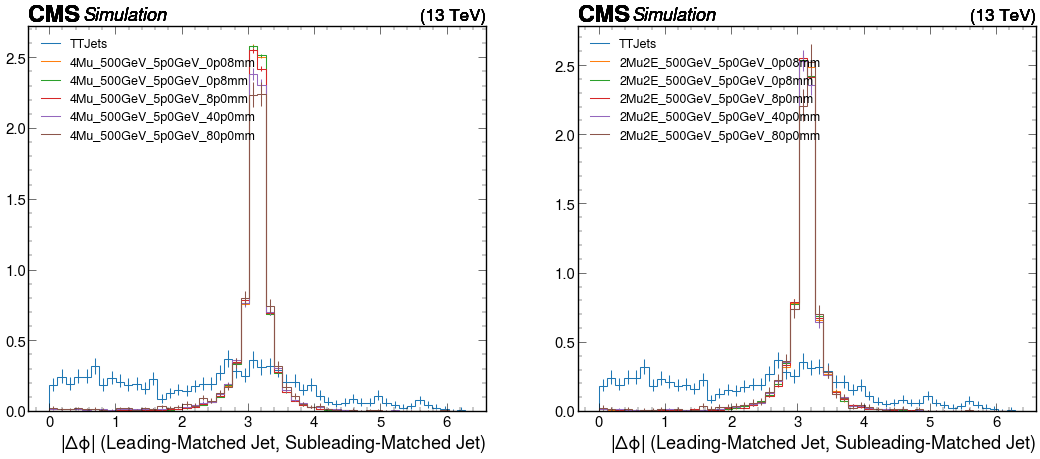

In [11]:
plt.subplots(1,2,figsize=(26,10))

plt.subplot(1,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(1,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 18})

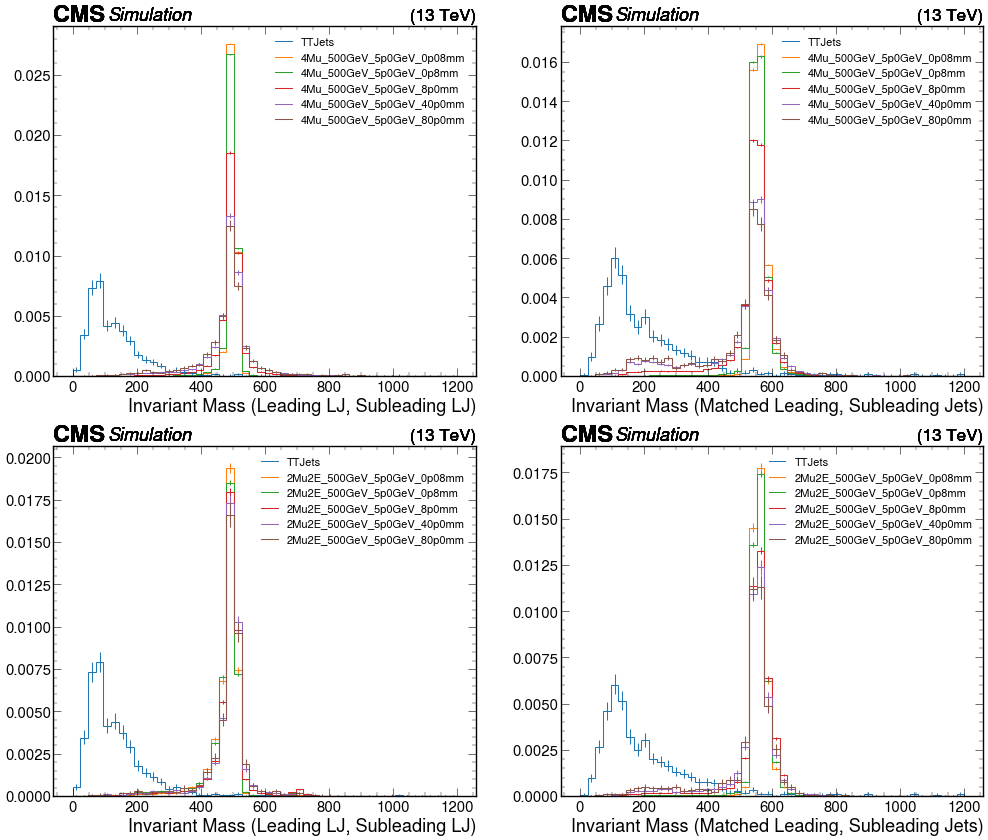

In [12]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

(0.1, 1000000)

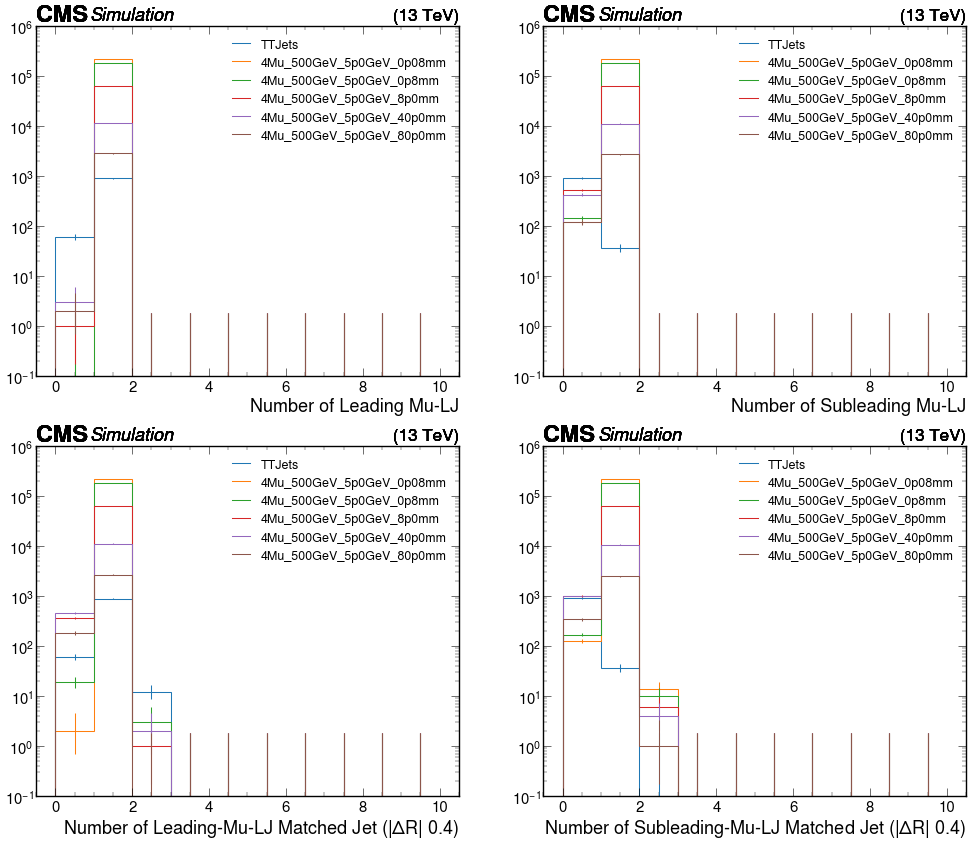

In [13]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

(0.1, 1000000)

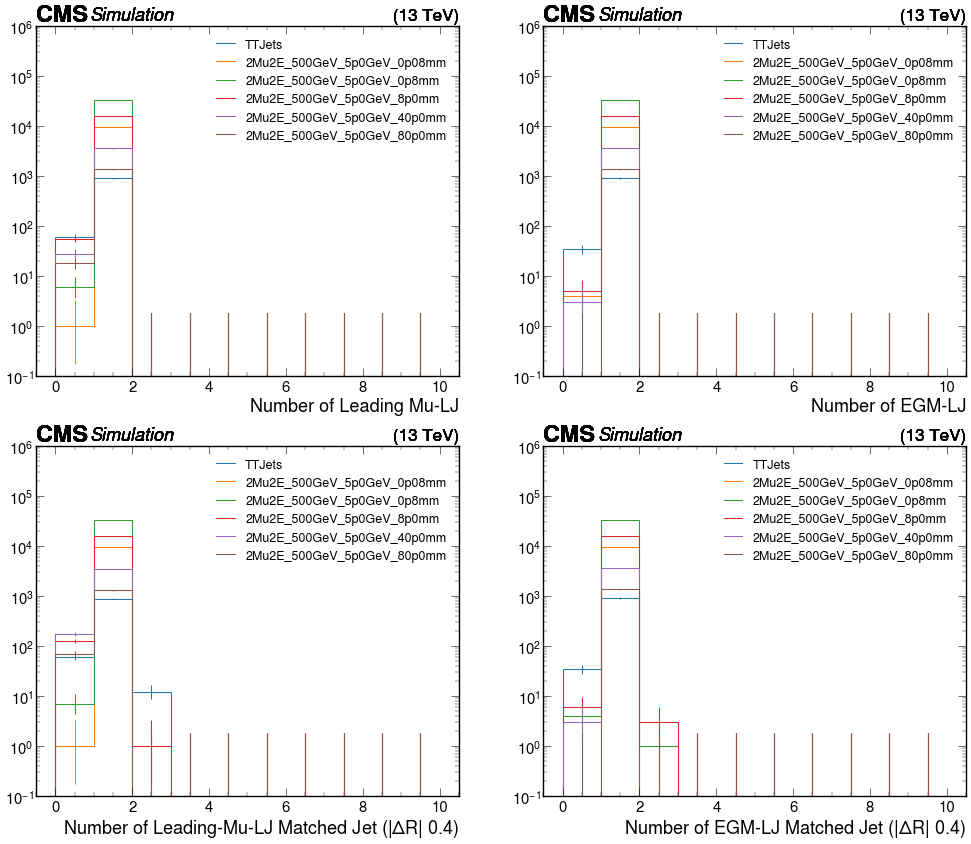

In [14]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_egm_lj_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,1000000)

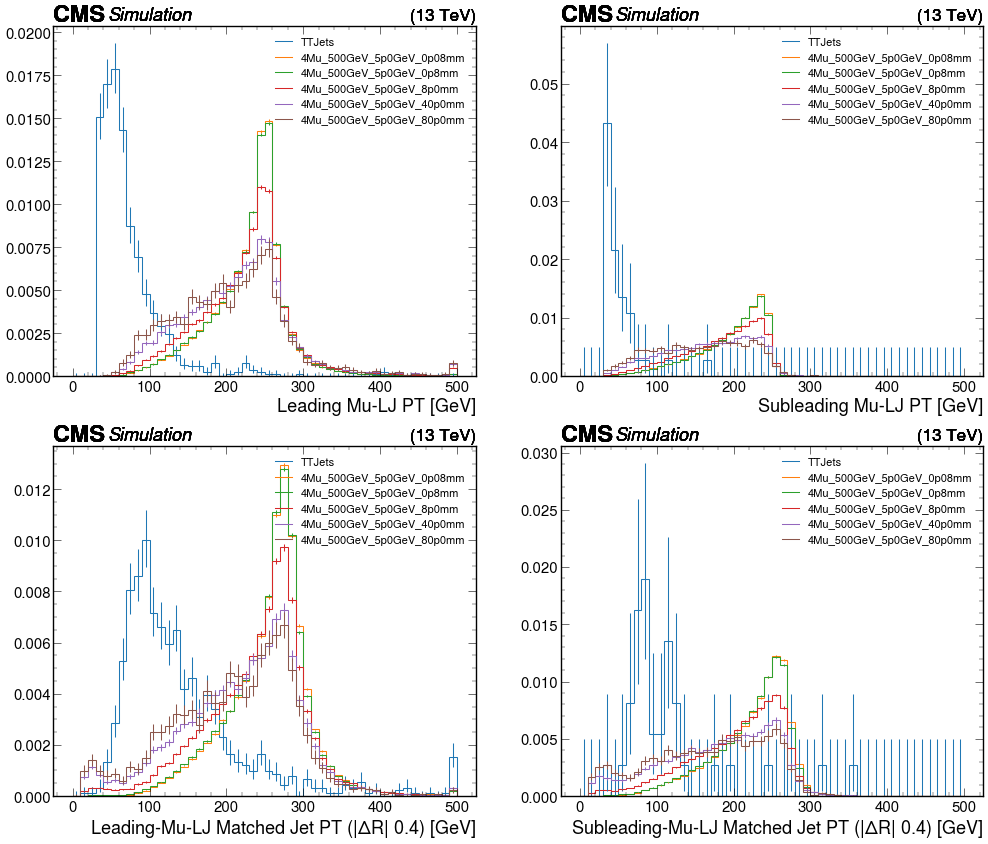

In [15]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

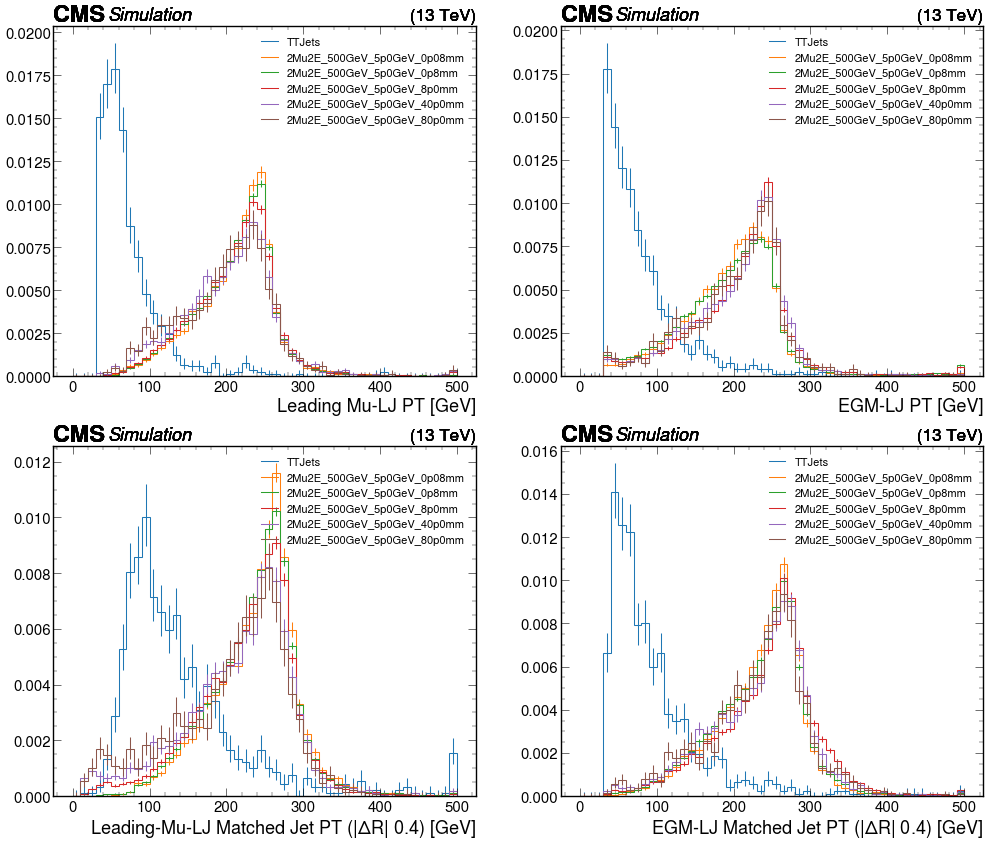

In [16]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_egm_lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

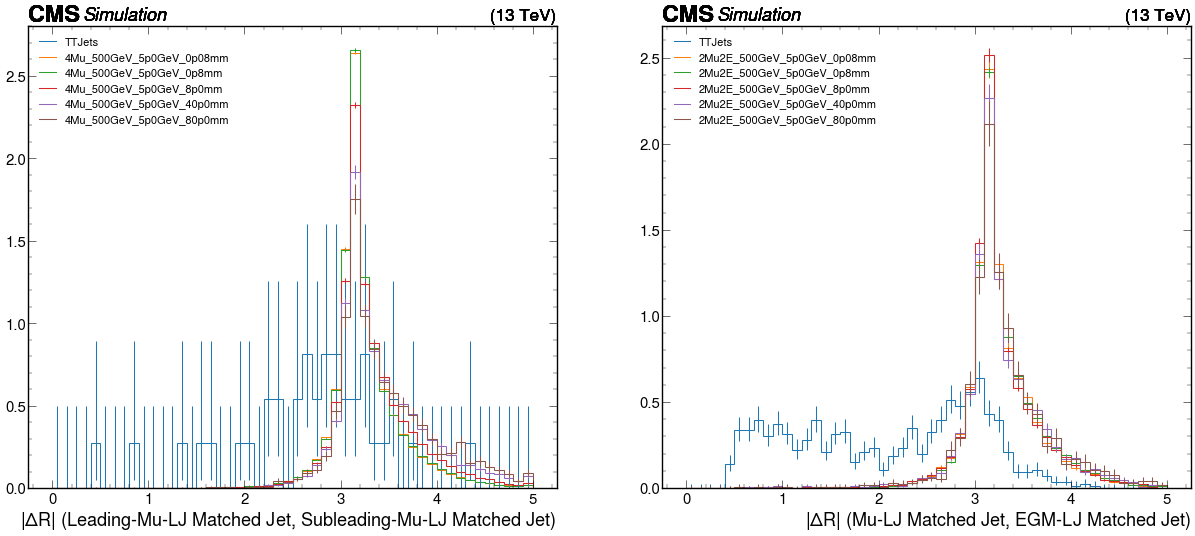

In [17]:
plt.subplots(1,2,figsize=(30,12))

plt.subplot(1,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_egm_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

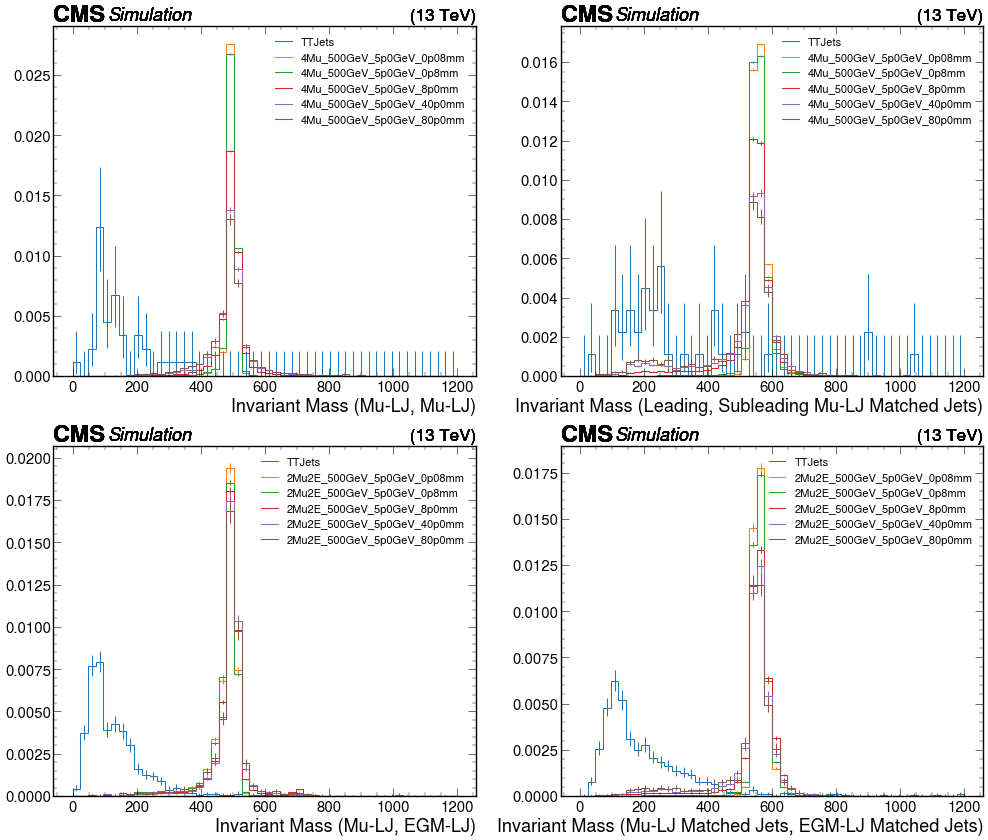

In [18]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_lj_egm_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_egm_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

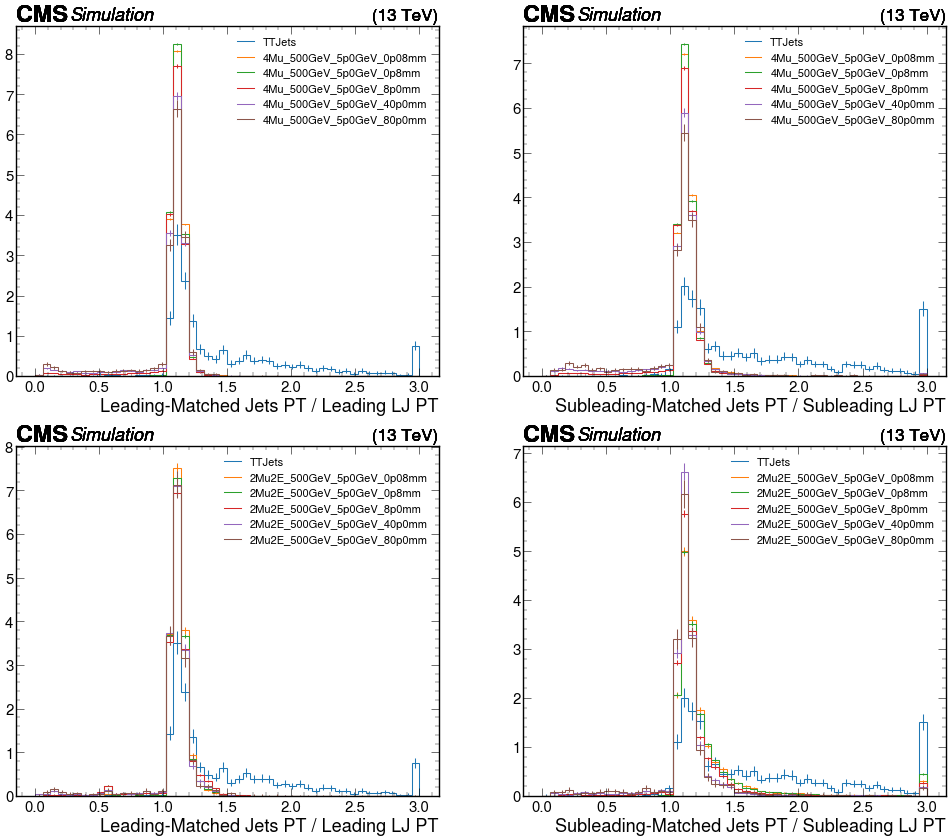

In [19]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

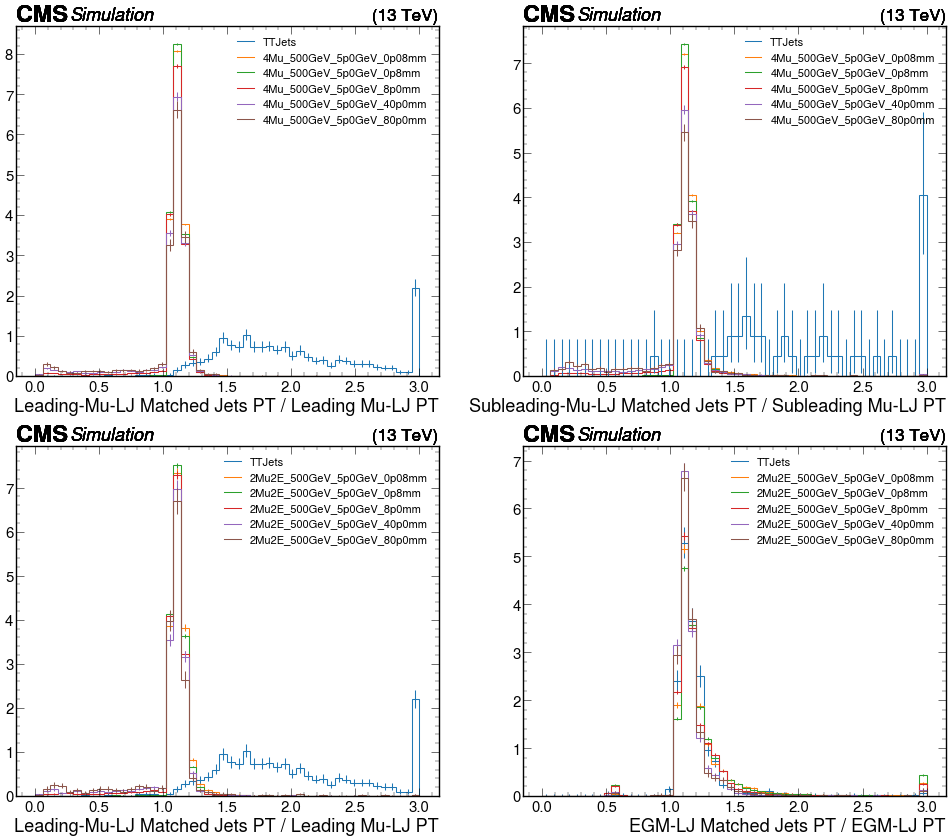

In [20]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

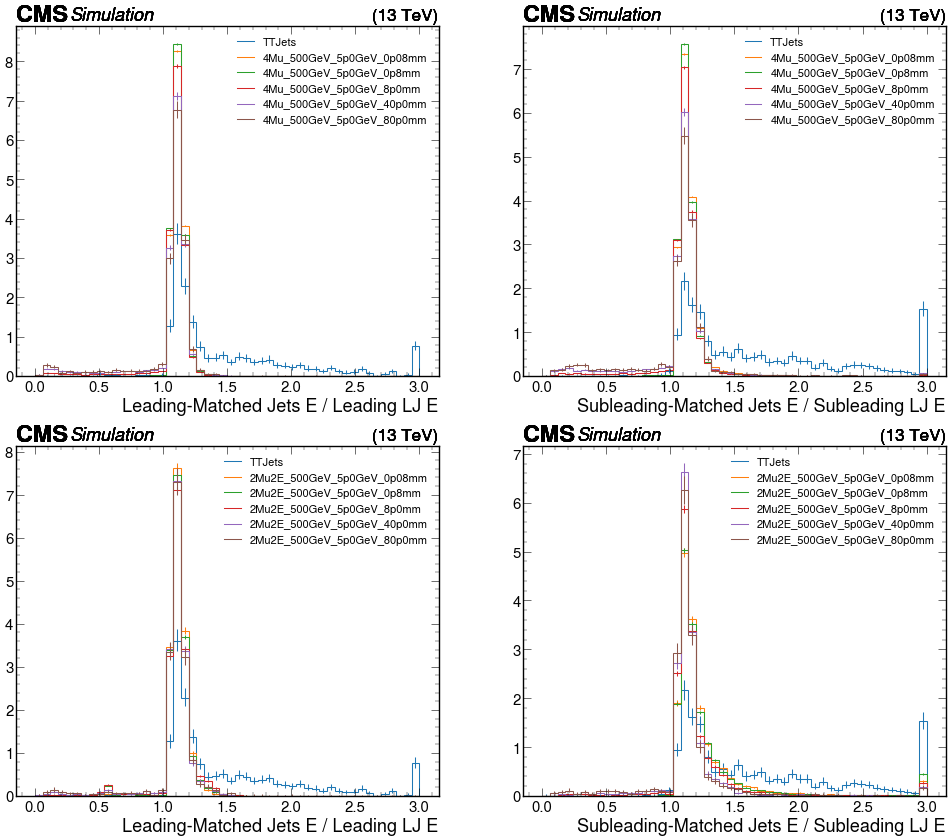

In [21]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

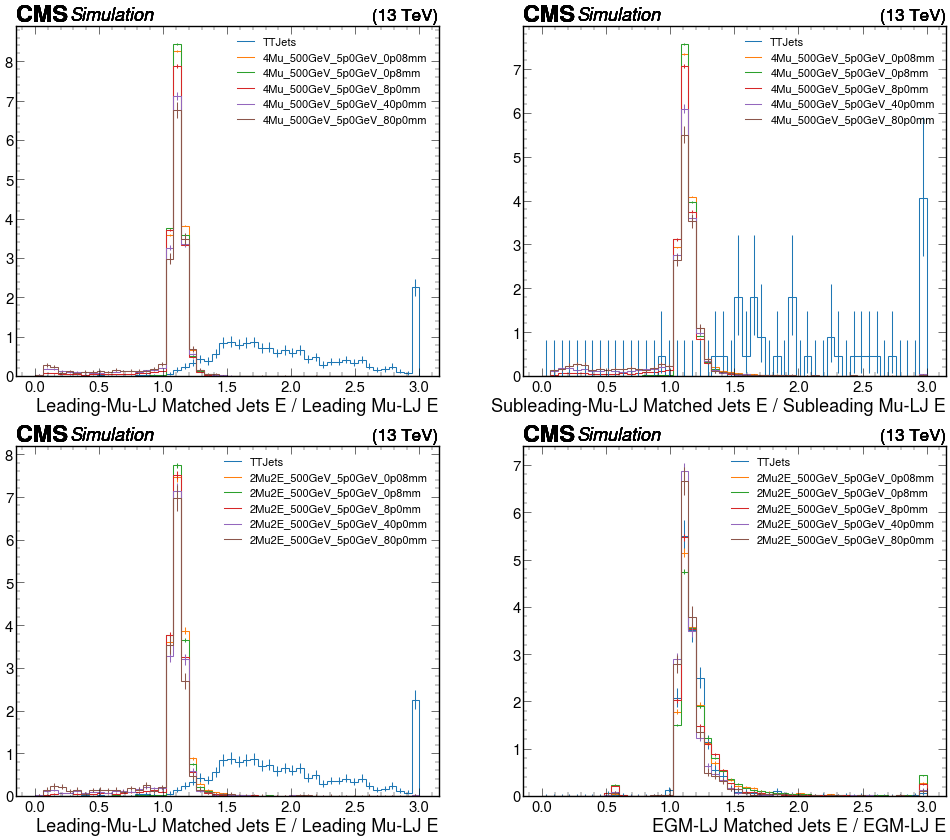

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

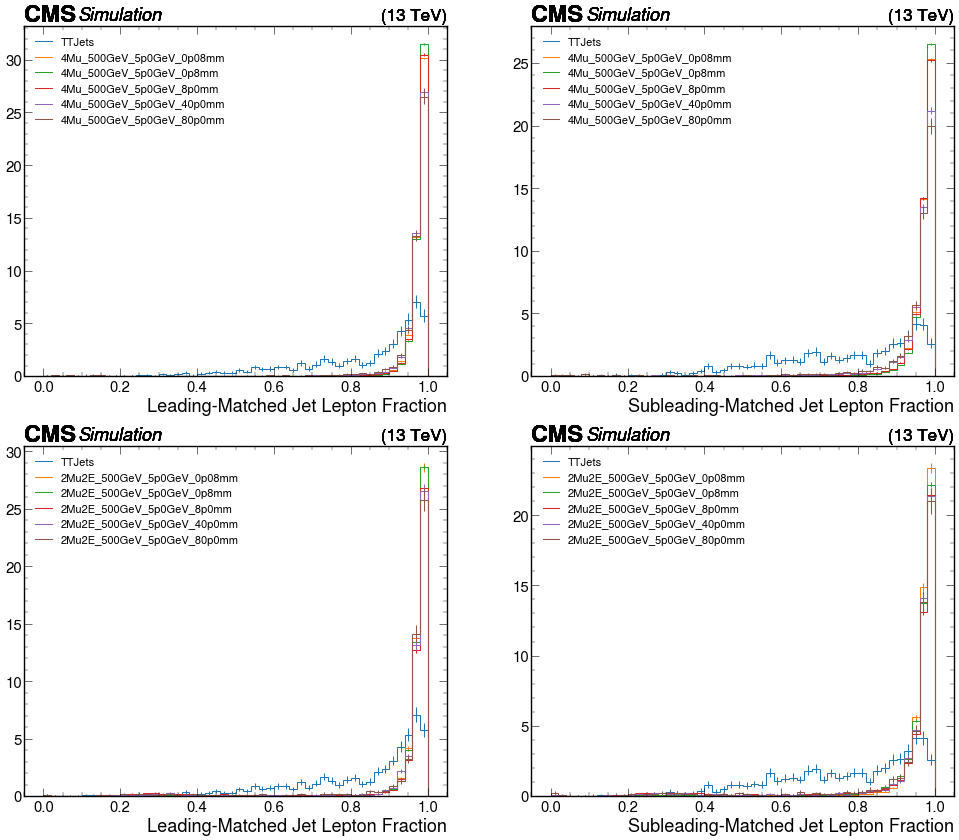

In [23]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

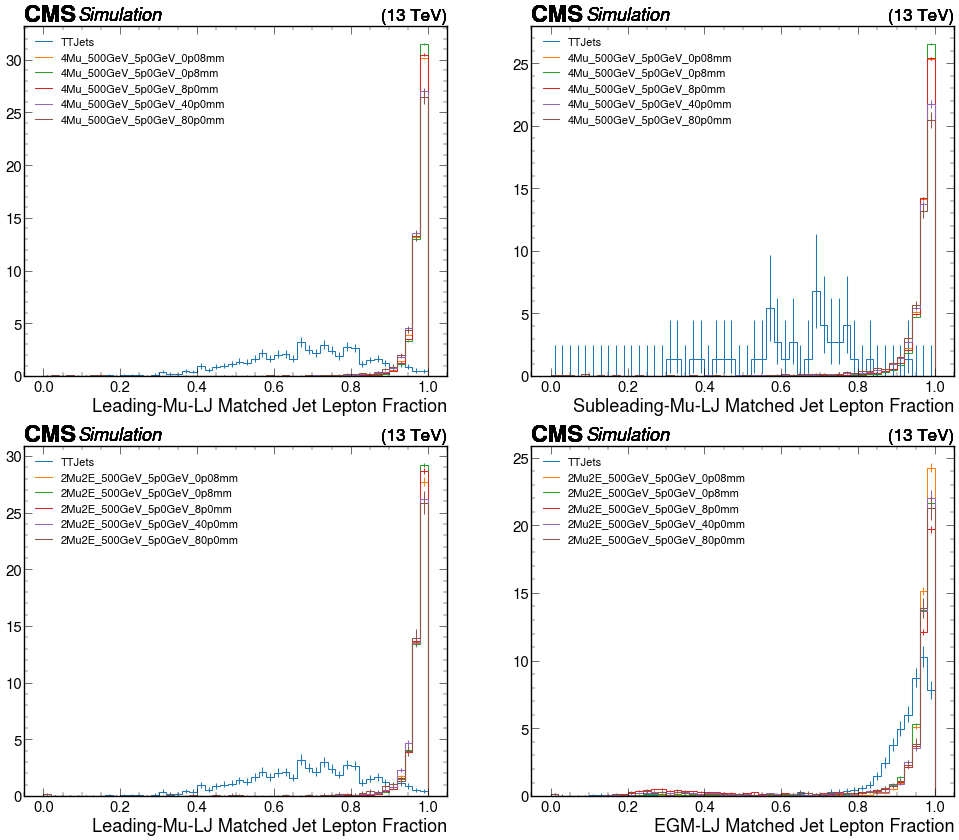

In [24]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

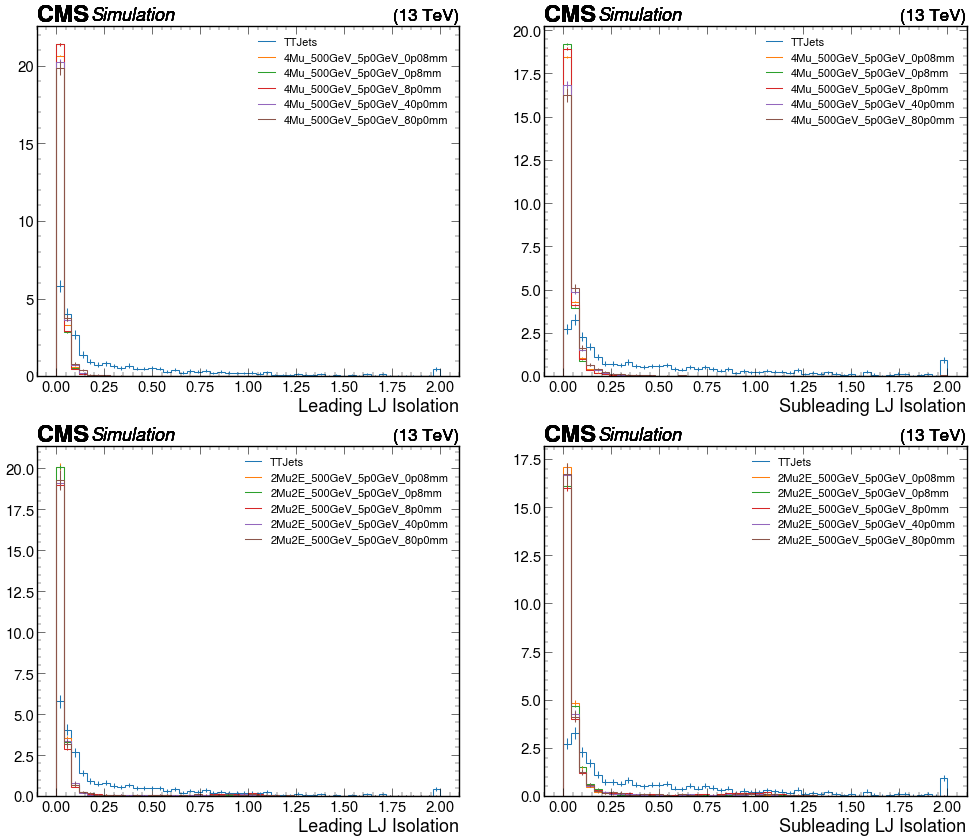

In [25]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

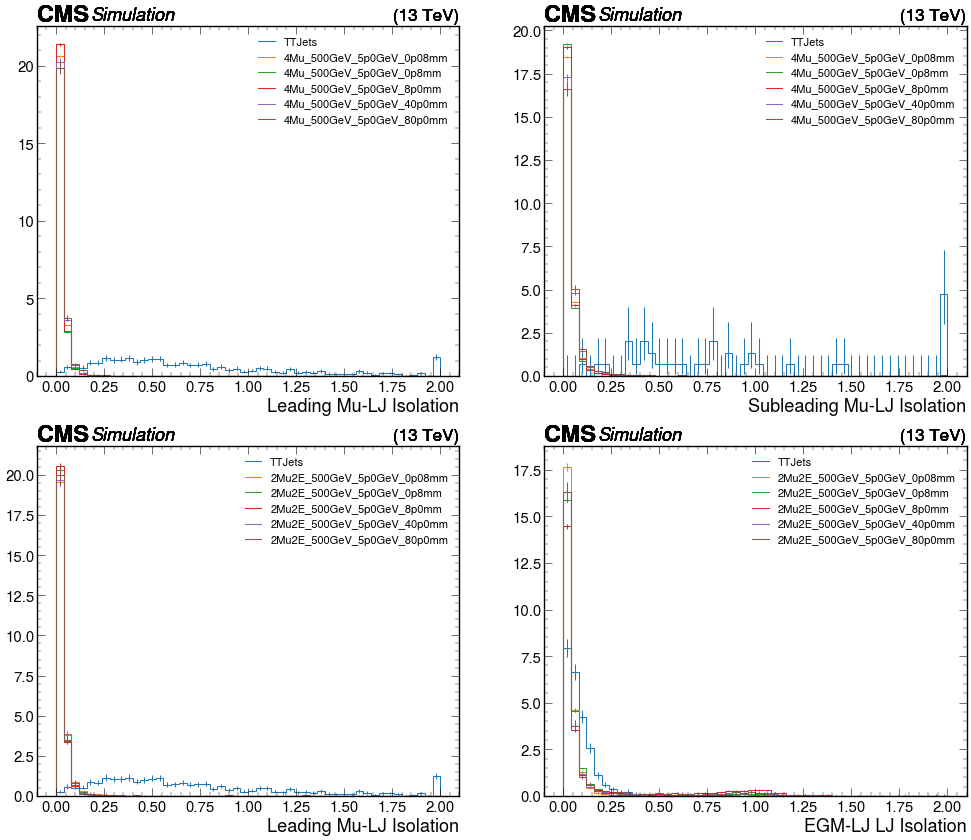

In [26]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

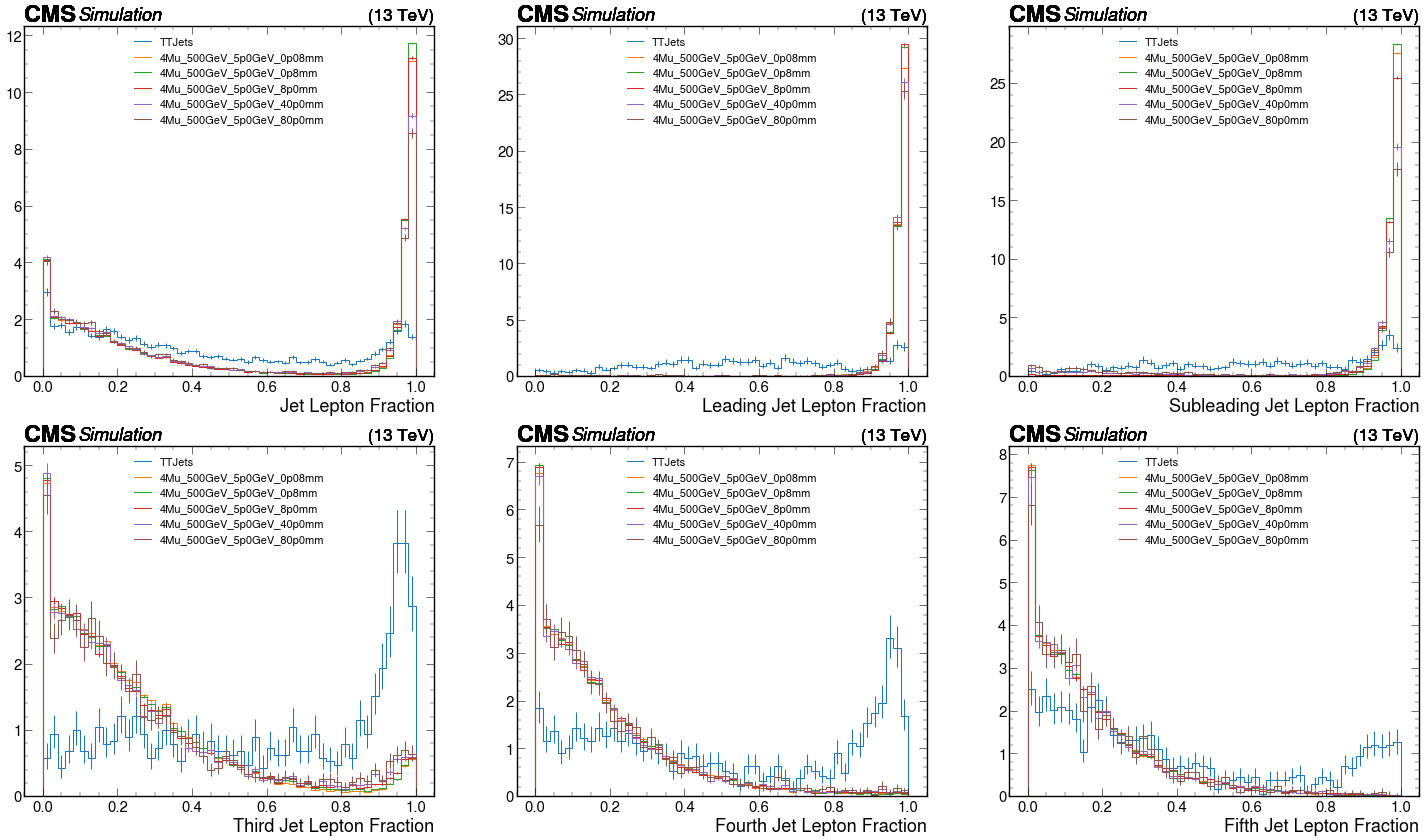

In [27]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

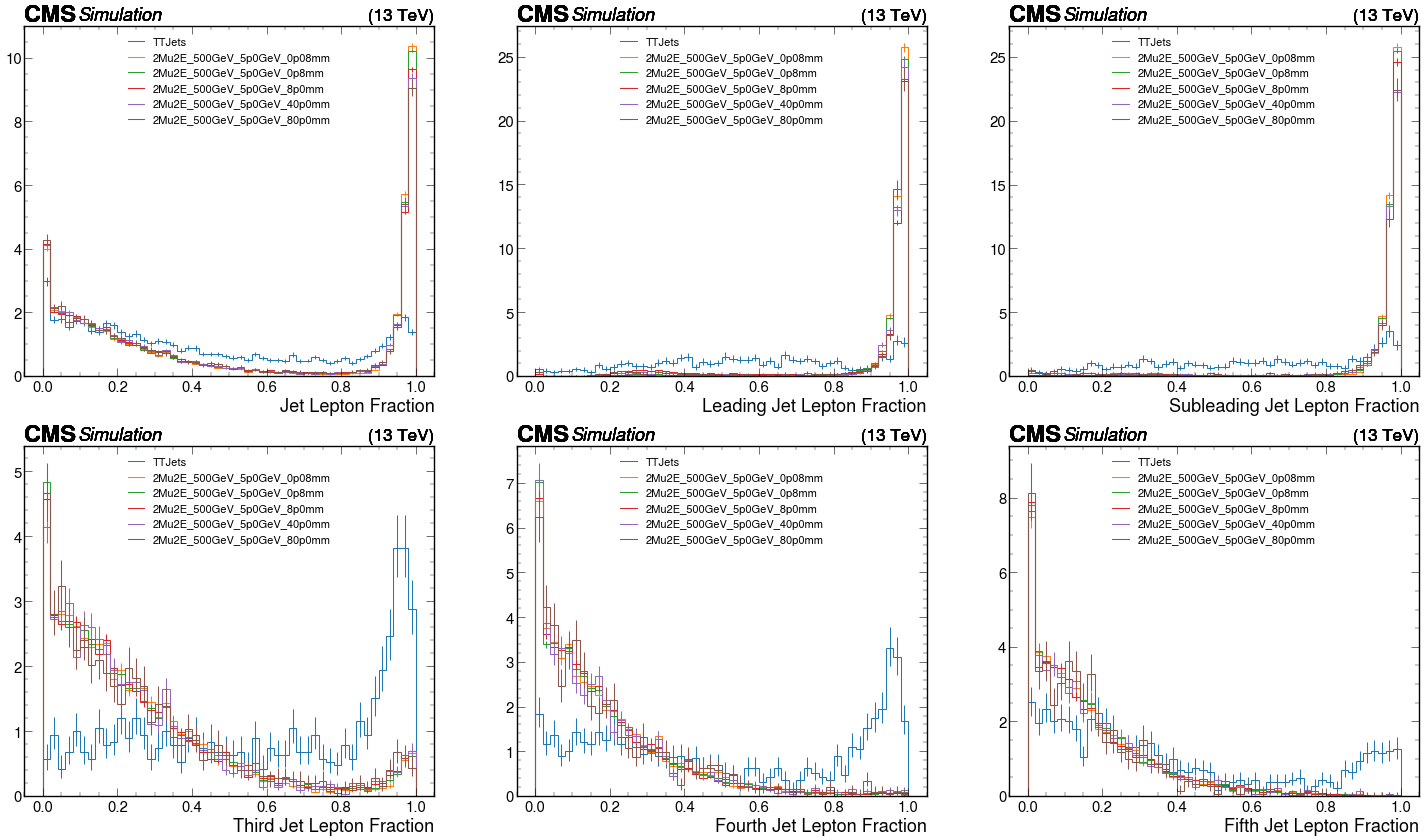

In [28]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

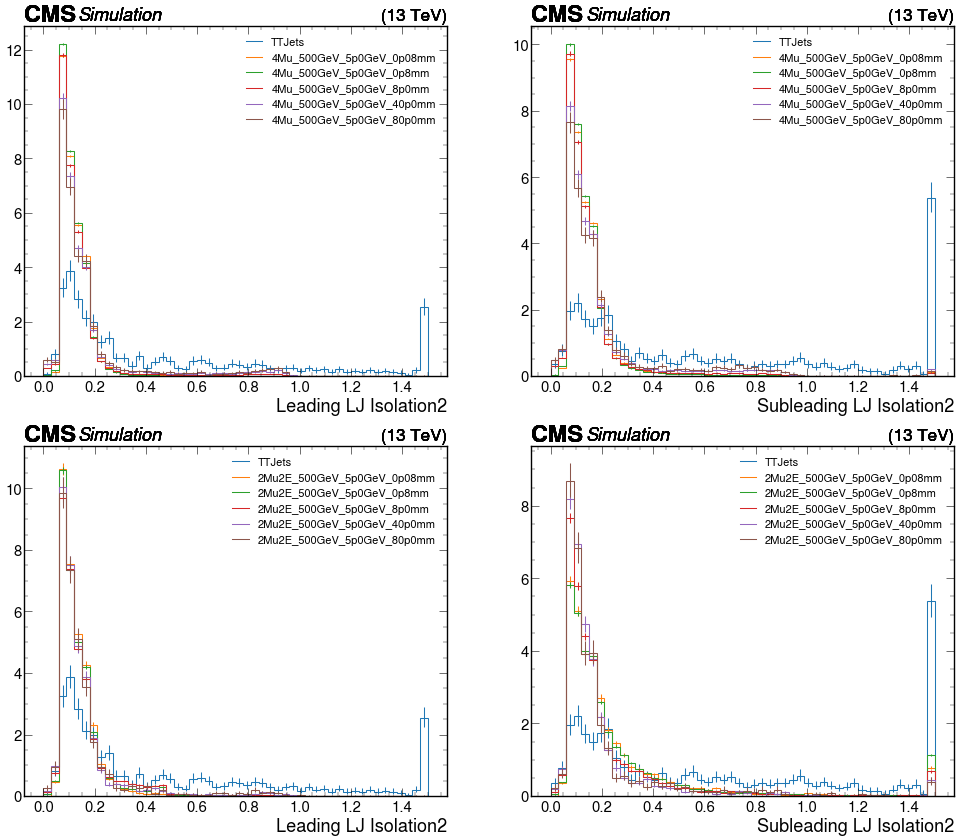

In [29]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

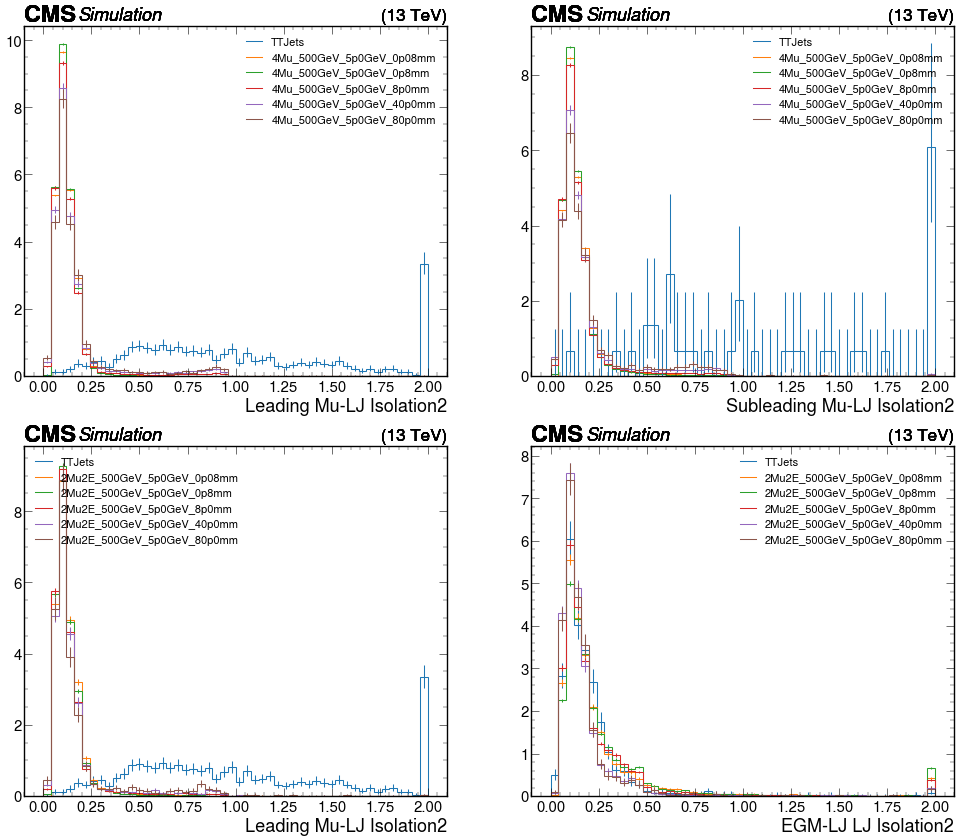

In [30]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

In [31]:
for sample in samples_4mu:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 1935
TTJets Total Mu-LJs 933
TTJets Total EGM-LJs 1002

TTJets Total Matched-Jets 1924
TTJets Total Leading-Mu-Matched-Jets 908
TTJets Total Subleading-Mu-Matched-Jets 37
TTJets Total EGM-Matched-Jets 922
##############################

4Mu_500GeV_5p0GeV_0p08mm Total LJs 446884
4Mu_500GeV_5p0GeV_0p08mm Total Mu-LJs 445791
4Mu_500GeV_5p0GeV_0p08mm Total EGM-LJs 1093

4Mu_500GeV_5p0GeV_0p08mm Total Matched-Jets 445908
4Mu_500GeV_5p0GeV_0p08mm Total Leading-Mu-Matched-Jets 222949
4Mu_500GeV_5p0GeV_0p08mm Total Subleading-Mu-Matched-Jets 222836
4Mu_500GeV_5p0GeV_0p08mm Total EGM-Matched-Jets 1089
##############################

4Mu_500GeV_5p0GeV_0p8mm Total LJs 359976
4Mu_500GeV_5p0GeV_0p8mm Total Mu-LJs 359054
4Mu_500GeV_5p0GeV_0p8mm Total EGM-LJs 922

4Mu_500GeV_5p0GeV_0p8mm Total Matched-Jets 359155
4Mu_500GeV_5p0GeV_0p8mm Total Leading-Mu-Matched-Jets 179577
4Mu_500GeV_5p0GeV_0p8mm Total Subleading-Mu-Matched-Jets 179434
4Mu_500GeV_5p0GeV_0p8mm Total EGM-Matched-Jets 9

In [32]:
for sample in samples_2mu:
    print(sample, "Total LJs", out_2mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_2mu[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_2mu[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 1935
TTJets Total Mu-LJs 933
TTJets Total EGM-LJs 1002

TTJets Total Matched-Jets 1924
TTJets Total Leading-Mu-Matched-Jets 908
TTJets Total Subleading-Mu-Matched-Jets 37
TTJets Total EGM-Matched-Jets 922
##############################

2Mu2E_500GeV_5p0GeV_0p08mm Total LJs 19231
2Mu2E_500GeV_5p0GeV_0p08mm Total Mu-LJs 9596
2Mu2E_500GeV_5p0GeV_0p08mm Total EGM-LJs 9635

2Mu2E_500GeV_5p0GeV_0p08mm Total Matched-Jets 19182
2Mu2E_500GeV_5p0GeV_0p08mm Total Leading-Mu-Matched-Jets 9590
2Mu2E_500GeV_5p0GeV_0p08mm Total Subleading-Mu-Matched-Jets 6
2Mu2E_500GeV_5p0GeV_0p08mm Total EGM-Matched-Jets 9587
##############################

2Mu2E_500GeV_5p0GeV_0p8mm Total LJs 67211
2Mu2E_500GeV_5p0GeV_0p8mm Total Mu-LJs 33519
2Mu2E_500GeV_5p0GeV_0p8mm Total EGM-LJs 33692

2Mu2E_500GeV_5p0GeV_0p8mm Total Matched-Jets 67031
2Mu2E_500GeV_5p0GeV_0p8mm Total Leading-Mu-Matched-Jets 33509
2Mu2E_500GeV_5p0GeV_0p8mm Total Subleading-Mu-Matched-Jets 9
2Mu2E_500GeV_5p0GeV_0p8mm Total EGM-Matc

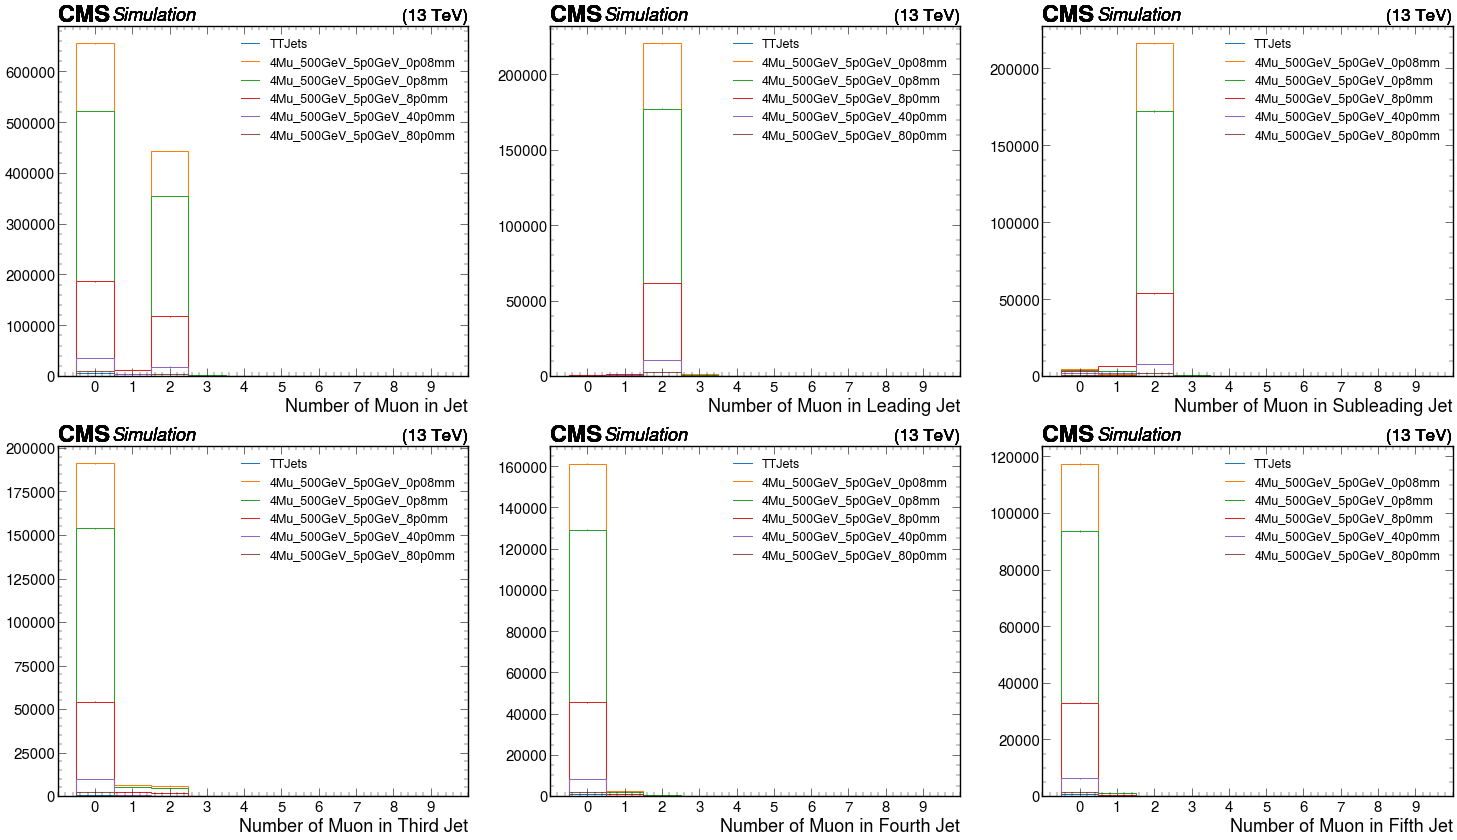

In [33]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

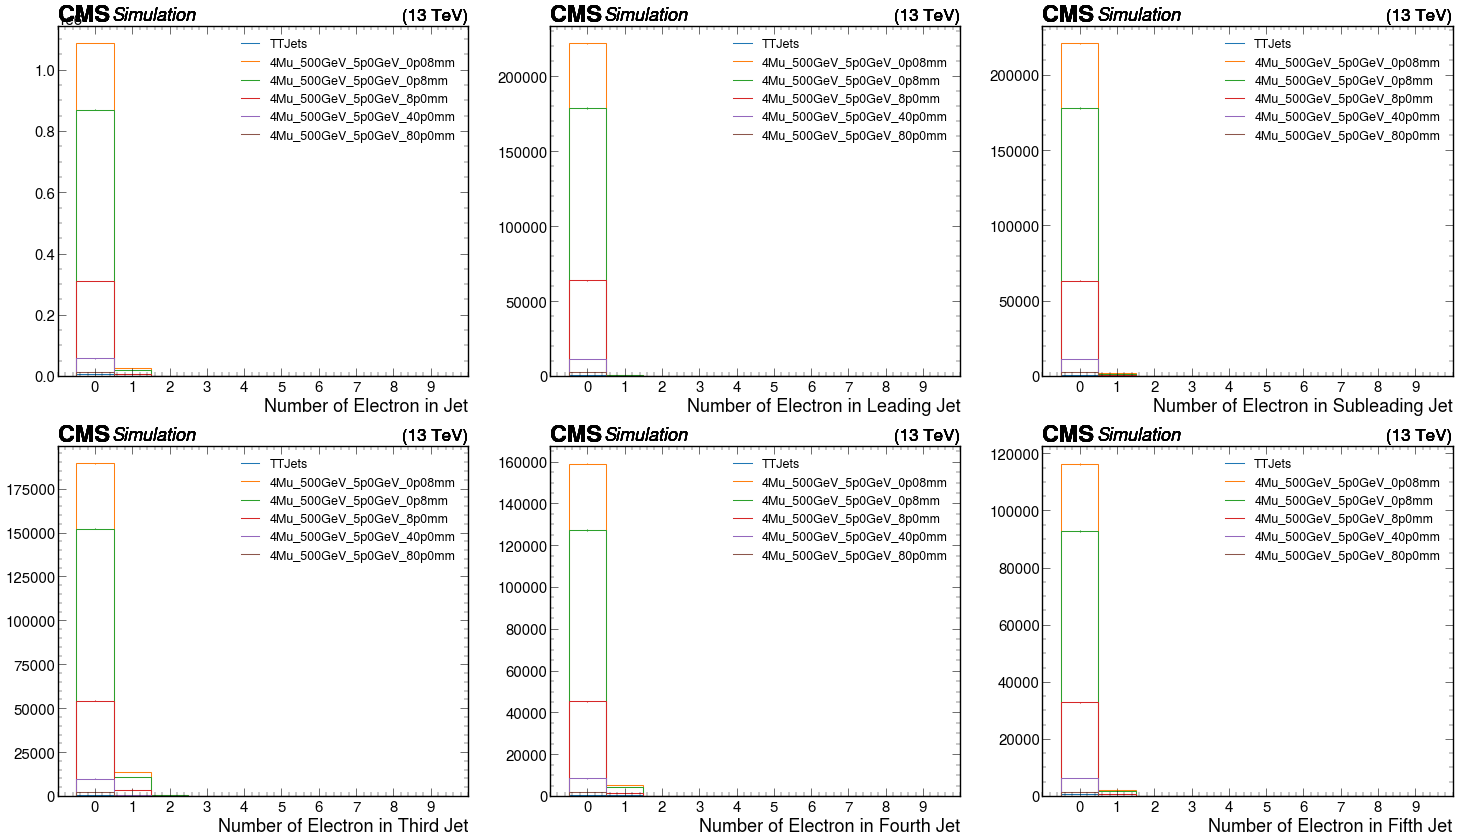

In [34]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_nelectron"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_nelectron"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_nelectron"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_nelectron"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_nelectron"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_nelectron"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

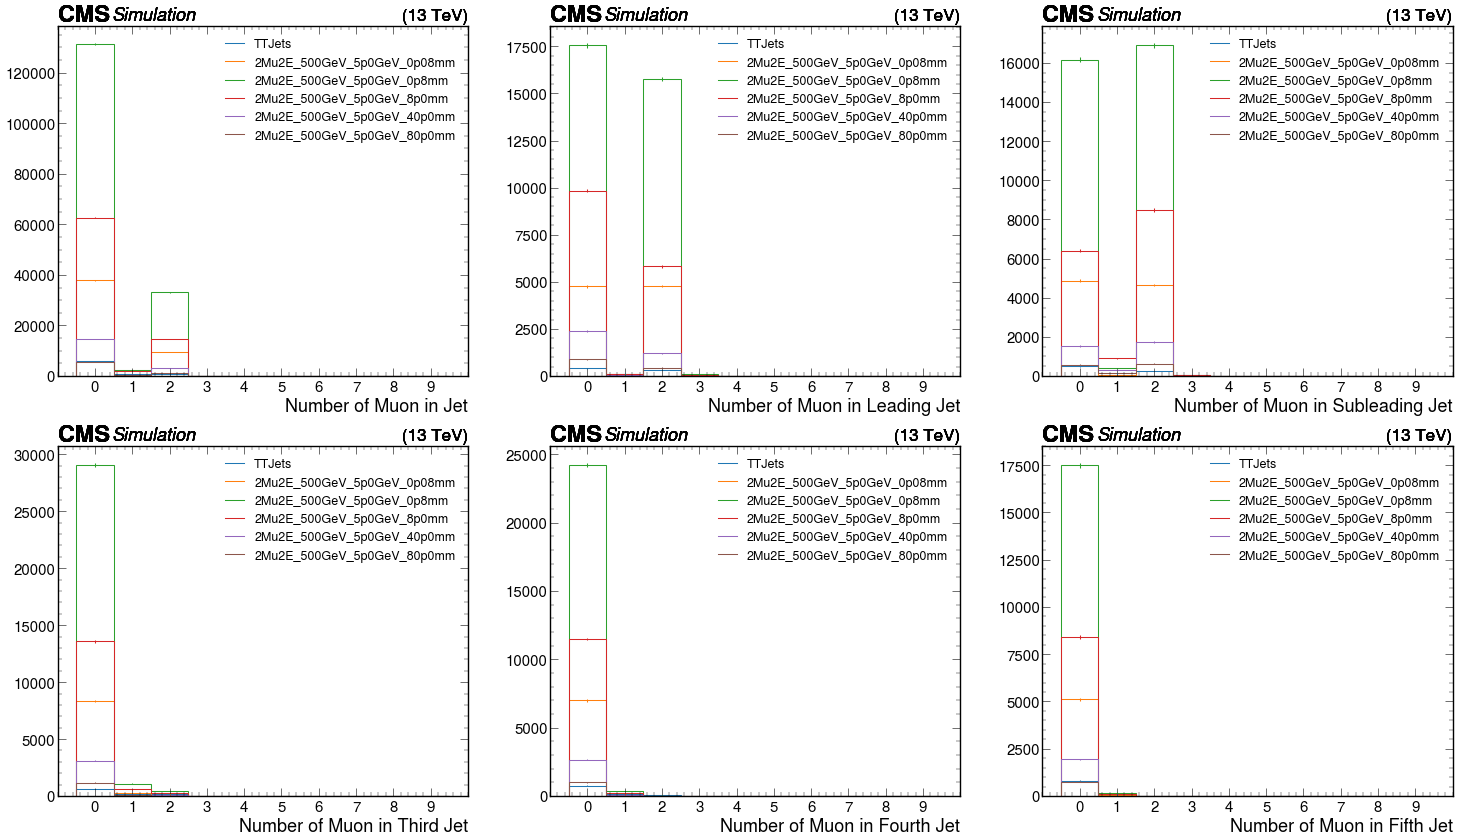

In [35]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_nmuon"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_nmuon"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_nmuon"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_nmuon"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_nmuon"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_nmuon"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

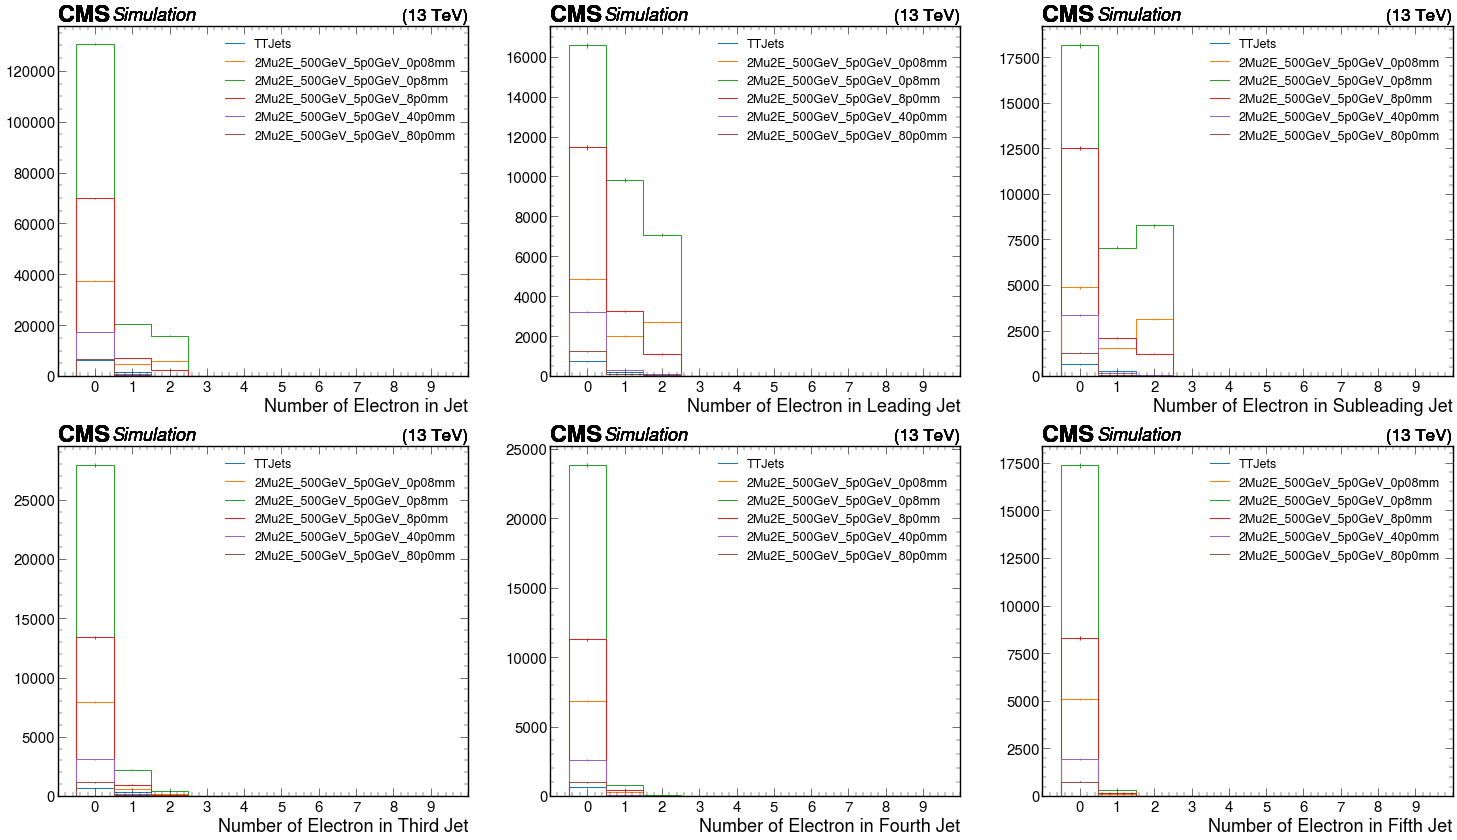

In [36]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_nelectron"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_nelectron"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_nelectron"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_nelectron"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_nelectron"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_nelectron"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})